In [1]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import passenger

%reload_ext autoreload

In [2]:
fastq_path = "input/outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2.fastq.gz"
blast_path = "passenger-blast/outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2.blast.tsv"
prefix = "11a"
query_length = 32
mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_LC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

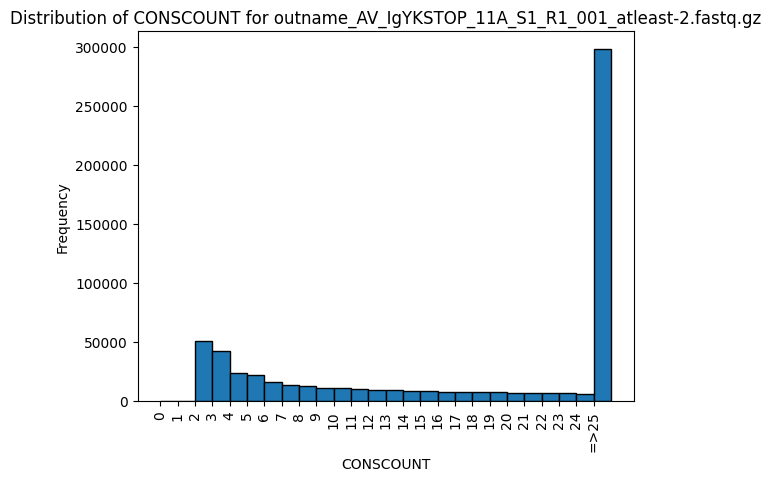

In [4]:
conscounts = passenger.umi_histogram(fastq_path, 25)


In [5]:
blast_df = passenger.blast_df_of_blast_files([blast_path], query_length)

processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)
processed_stop_df

Before filtering by length: 145180
After filtering by length: 92938
Note: multiple hits found in BLAST results for passenger-blast/outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2.blast.tsv.
Original length: 92938
After dropping sequences with multiple hits: 92908



,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,TTTACAACCATCAAGAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,68,99,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,TGTGCTCTTCCGATCTACTATTTACTATATAAGCGATACGGGGAGA...,2,True,[135],[A],"[31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 4...",1,20,0
1,GATGACGGGAGATAGGC|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,49,80,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGA...,2,True,"[100, 105, 321]","[T, C, G]","[229, 234, 237, 246, 253, 254, 259, 273, 275, ...",3,18,1
2,AAAAAAGGAACCAGCCA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,28,59,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGT...,2,False,"[115, 320]","[G, G]","[163, 177, 185, 248, 249, 250, 251, 252, 254, ...",2,16,2
3,GGGTACAGGGACTCAAT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[122, 165, 319]","[A, T, T]","[229, 234, 237, 246, 253, 254, 259, 273, 275, ...",3,16,3
4,GTGCGAGCCCCCAGAAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,52,83,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,3,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...","[295, 296, 297, 298, 300, 301, 302, 303, 304, ...",148,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92903,TTACAAAGGCTTTGGAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,0,1,1,32,69,97,5.100000e-02,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,[295],[T],[],1,0,92903
92904,GGTAGACGGCAAAATTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,0,1,1,32,52,80,5.100000e-02,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,[27],[A],[],1,0,92904
92905,TGCTAGTGCCACGGGAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,2,1,1,32,28,58,8.000000e-01,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCAGGTG...,1,False,"[2, 14, 28, 30, 31, 32, 42, 43, 44, 45, 47, 48...","[G, G, G, G, C, C, T, G, G, A, T, C, A, C, G, ...",[],70,0,92905
92906,AAAAATCGTACTAGTTG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,2,1,1,32,51,81,8.000000e-01,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATG...,2,True,"[92, 277]","[A, A]",[],2,0,92906


In [6]:
chigy.pretty_print_alignments(processed_stop_df.head())

> outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2 0
----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                          |||||||||||||||||||||||||||||| ....|..........|....|||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||          
TGTGCTCTTCCGATCTACTATTTACTATATAAGCGATACGGGGAGACGCGCGCCTCCACCATGGAGTCACAGAC

In [7]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2    92908
dtype: int64


In [8]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0      5404
1     15532
2     24292
3     14704
4      8059
5      4152
6      2120
7      1088
8       511
9       295
65      296
85      352
86      563
87      748
88     1019
89     1572
90     1757
91     1417
92      832
93      400
Name: count, dtype: int64

In [9]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
8,AAATTAAAAAAAAAAAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,68,99,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,ATCAGACATGAGCANAACAANAATCANATAANCAANATANCANANA...,2,True,"[233, 254, 266, 319]","[A, T, C, T]",[],4,0,8
12,CGAAAAAAAAAAAATGA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,49,80,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,ATCATACTATATNACATCACAAATAGANNANCNAANAAANAATNNA...,2,True,"[90, 309]","[G, G]",[],2,0,12
13,TTACAAAAAAAAGAAAC|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,53,84,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,TTCAAACATCATCTCTTCCAAAAATCAGAAACNAGNGCNANCANCA...,2,True,"[25, 82, 277]","[C, T, T]","[319, 321]",3,2,13
14,AAACAAAACGTACCATA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,65,96,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,AGACATGAGCAAAACAANAATCCTCNANTCCANCTCTNANANANNC...,2,True,[],[],[],0,0,14
18,CAAAAAAAAAATACTAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,46,77,2.260000e-10,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,ATCATAACTTACATCTATCANAGACNANAANANAAAANATNNATTC...,2,True,[],[],[],0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92902,TAGGGAGTAAAAAAGAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,0,1,1,32,25,53,5.100000e-02,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTGGTTGT...,2,True,[],[],[],0,0,92902
92903,TTACAAAGGCTTTGGAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,0,1,1,32,69,97,5.100000e-02,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,[295],[T],[],1,0,92903
92904,GGTAGACGGCAAAATTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,0,1,1,32,52,80,5.100000e-02,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,[27],[A],[],1,0,92904
92906,AAAAATCGTACTAGTTG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,2,1,1,32,51,81,8.000000e-01,...,outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2,GAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATG...,2,True,"[92, 277]","[A, A]",[],2,0,92906


In [10]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2 8
----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                          |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||.|||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||.||          
ATCAGACATGAGCANAACAANAATCANATAANCAANATANCANANAANCGCNCCTCCACCATGGAGTCACAGAC

In [11]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     5340
1    15360
2    23905
3    14353
4     7838
5     3954
6     1980
7      987
8      453
9      226
Name: count, dtype: int64

In [12]:
len(chigy_believable)

74396

In [13]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> outname_AV_IgYKSTOP_11A_S1_R1_001_atleast-2 14
-------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                       ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||          
AGACATGAGCAAAACAANAATCCTCNANTCCANCTCTNANANANNCGCGCCTCCACCATGGAGTCACAGACTCAGGTCT

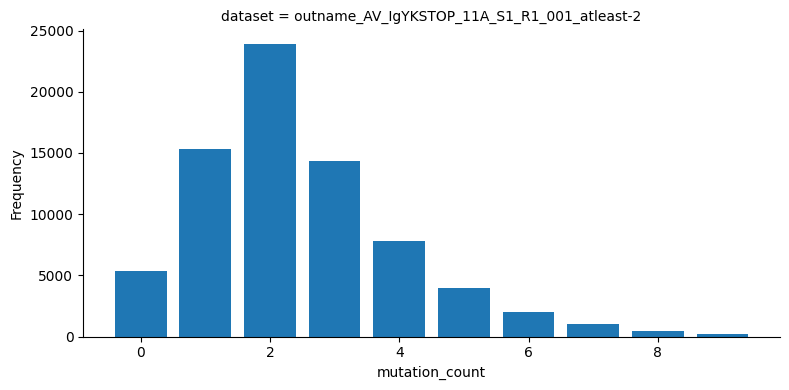

In [14]:
passenger.make_mutation_histogram(chigy_believable)

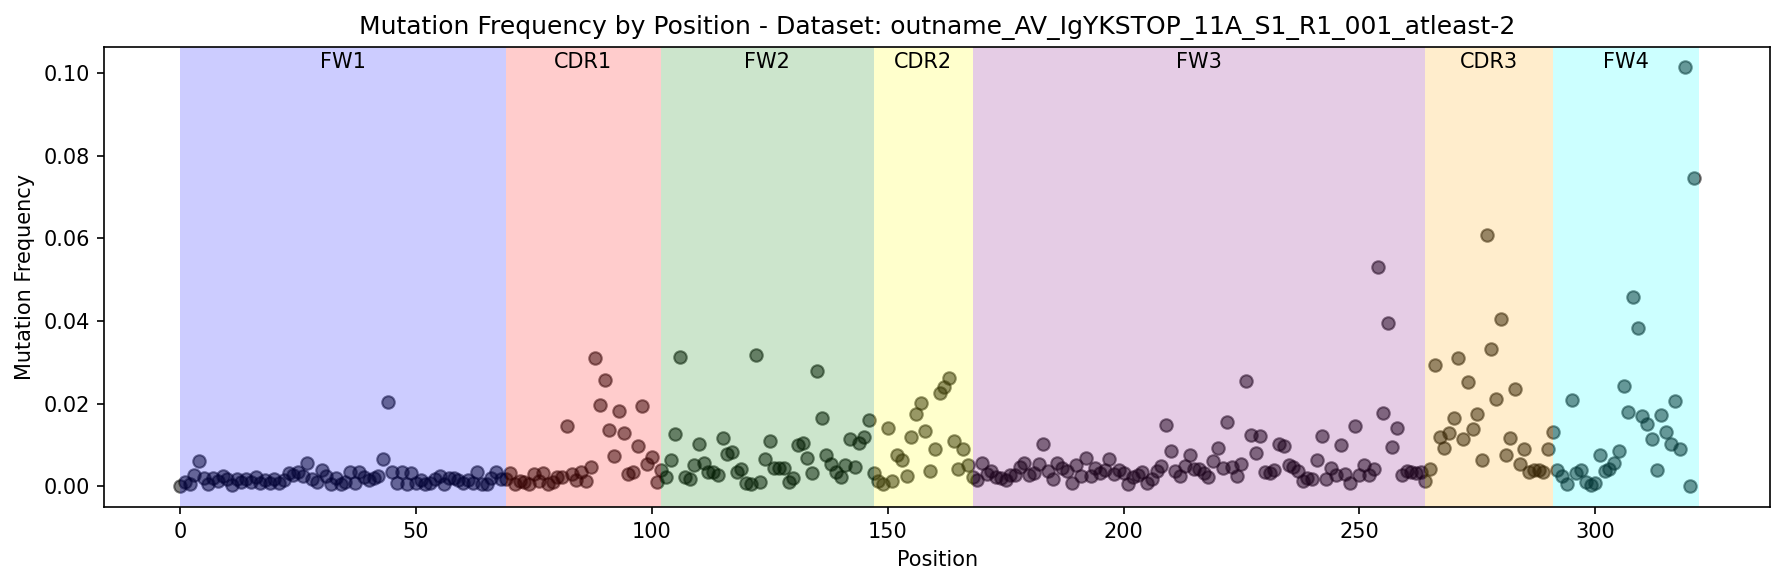

In [15]:
chigy.mutation_rate_plot_of_counts(chigy_believable)


In [16]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv("output/"+prefix+"_counts_by_base.csv")

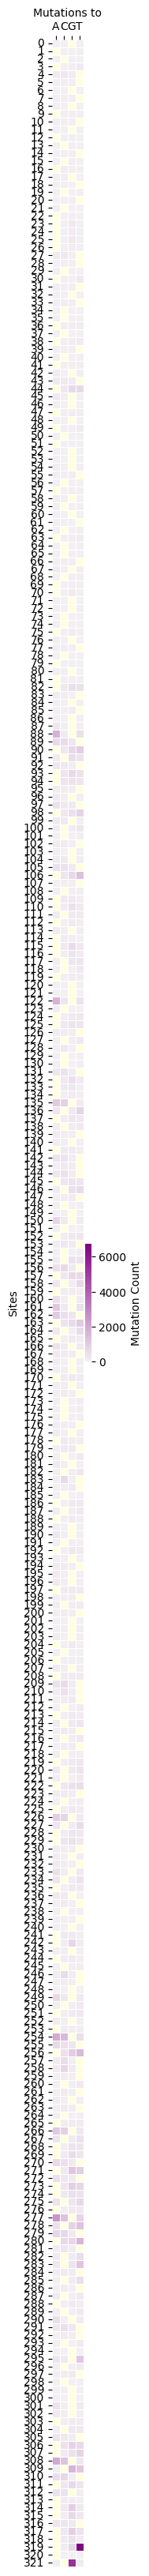

In [17]:
passenger.create_mutation_heatmap(counts_by_base)

In [18]:
counts_by_base.iloc[319]

A      -1
C     121
G     698
T    6723
Name: 319, dtype: int64

In [19]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    54959
GAAATAATACGGGCTGATGC     4234
GAAATAAAAGGGGCTGATGC     3110
GAAATAATAGGGGCTGATGC     1071
GAAATAANACGGGCTGATGC      775
                        ...  
AGAAATCAAACGGGTGATGC        1
GAAATAAAACGGGCTGTTGC        1
AGAAATAAAACGGGCTGACC        1
GAAATAATANGGGCTGNTGC        1
GATATAAGAGGGGCTGATGC        1
Name: count, Length: 521, dtype: int64

In [20]:
n_counts = passenger.compute_thing_counts(chigy_believable, "n_positions")
n_series = pd.DataFrame({"count of Ns": n_counts, "n_freq": n_counts/len(chigy_believable)}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"
n_series.head(10)

,count of Ns,n_freq
site,,
319,2049,0.027542
321,1974,0.026534
295,1131,0.015202
307,605,0.008132
306,215,0.002890
49,76,0.001022
301,75,0.001008
16,73,0.000981
3,29,0.000390


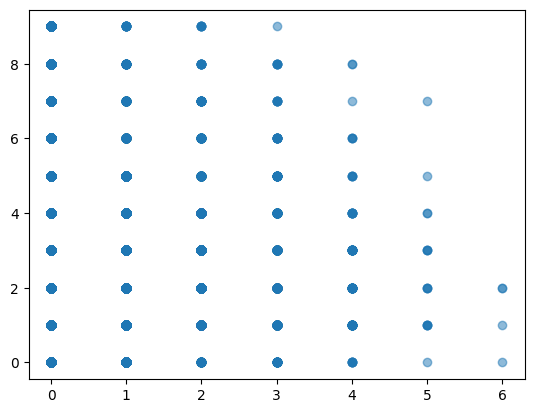

In [21]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [22]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv("output/"+mut_freq_name+".csv", index=False)